# Assignment 2: Elasticsearch and Text Mining

Due: Monday, December 12, 2022, at 2pm via Moodle

**Team Members** `<Fill out>`

In [ ]:
!pip3 install pandas

### Submission Guidelines

- Solutions need to be uploaded as a single Jupyter notebook. You will find this notebook contains some pre-filled cells that you should complete for the individual tasks.
- For answers requiring written solutions, use Markdown cells (in combination with Jupyter LaTeX support) **inside this notebook**. Do *not* hand in any separate files, simply re-upload the `.ipynb` file.
- Download the .zip file containing the dataset but do *not* upload it with your solution.
- Make sure that the names of all team members are present in the solution.

In [ ]:
%%bash
#. ~/.bashrc
!pip3 install -r '/Users/anureddy/Desktop/Sem01/DataScience_for_text_analytics/Assignments/Assignment02/Assignment_02/requirements.txt'
# Install necessary packages

: 

In [1]:
%%bash
./ ~/.bashrc
python3 -m spacy download en_core_web_sm
# Install required language model for spaCy

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


bash: line 1: ./: is a directory
You should consider upgrading via the 'pip install --upgrade pip' command.



## Question 2-1: "The Simpsons" Dataset (1 + 4 + 3 + 2 + 6 + 5 = 21 points)

"The Simpsons" is the world’s longest-running animated sitcom. The show revolves around the lives of the Simpson family, which consists of Homer, Marge, Bart, Lisa, and the little Maggi.
For this exercise, you will work with the dataset that contains characters, locations, episode details, and script lines for approximately 600 Simpsons episodes, dating back to 1989.
We will explore the data and use visualizations to gain some insight into the show. The Zip file alongside this notebook should contain the following files:

` simpsons_characters.csv, simpsons_locations.csv, simpsons_script_lines.csv, simpsons_episodes.csv`

Take some time and familiarize yourself with the data. `simpsons_characters.csv` contains the character-names and their gender.
`simpsons_locations.csv` contains information about locations in the shows, and `simpsons_episodes.csv` has information about each episode including their title, rating, and views.
Finally, `simpsons_script_lines.csv` lists all the lines in the show, who said the line and where it was said. Be aware that this data set is not cleaned and, hence, includes faulty data as well as inconsistent data types.

In [2]:
# General imports
import os

import pandas as pd
import numpy as np
import spacy
import matplotlib
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# Ensure matplotlib works correctly with Jupyter
%matplotlib inline

### 1. Data Loading (1 point)
Load the four datasets in the respective variables using pandas, and make sure to set the type of the `character_id` to integer.

In [133]:
df_characters = pd.read_csv('/Users/anureddy/Desktop/Sem01/DataScience_for_text_analytics/Assignments/Assignment02/Assignment_02/data/simpsons_characters.csv')
df_locations = pd.read_csv('/Users/anureddy/Desktop/Sem01/DataScience_for_text_analytics/Assignments/Assignment02/Assignment_02/data/simpsons_locations.csv')
df_script = pd.read_csv('/Users/anureddy/Desktop/Sem01/DataScience_for_text_analytics/Assignments/Assignment02/Assignment_02/data/simpsons_script_lines.csv')
df_episodes = pd.read_csv('/Users/anureddy/Desktop/Sem01/DataScience_for_text_analytics/Assignments/Assignment02/Assignment_02/data/simpsons_episodes.csv')

/Users/anureddy/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
df_characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               6722 non-null   int64 
 1   name             6722 non-null   object
 2   normalized_name  6722 non-null   object
 3   gender           323 non-null    object
dtypes: int64(1), object(3)
memory usage: 210.2+ KB


In [19]:
df_locations

,id,name,normalized_name
0,1,Street,street
1,2,Car,car
2,3,Springfield Elementary School,springfield elementary school
3,4,Auditorium,auditorium
4,5,Simpson Home,simpson home
...,...,...,...
4454,4455,SKOBO'S,skobo
4455,4456,FLANDERS' BASEMENT,flanders basement
4456,4457,CASINO FLOOR,casino floor
4457,4458,BURNED CHURCH,burned church


In [28]:
df_script.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158271 entries, 0 to 158270
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  158271 non-null  int64  
 1   episode_id          158271 non-null  int64  
 2   number              158271 non-null  int64  
 3   raw_text            158271 non-null  object 
 4   timestamp_in_ms     158271 non-null  object 
 5   speaking_line       158271 non-null  object 
 6   character_id        140750 non-null  object 
 7   location_id         157864 non-null  float64
 8   raw_character_text  140749 non-null  object 
 9   raw_location_text   157863 non-null  object 
 10  spoken_words        132112 non-null  object 
 11  normalized_text     132087 non-null  object 
 12  word_count          132112 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 15.7+ MB


Drop all lines associated with the (non-numeric) character ID `142024`.

In [82]:
### Your code
df_script =  df_script.loc[df_script["id"]!=142024]

Next, use panda's `.head()` function to inspect the top rows of each dataframe.

In [40]:
### Your code
df_characters.head(5)
df_script.head(5)
df_locations.head(5)
df_episodes.head(5)


,id,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
0,10,http://static-media.fxx.com/img/FX_Networks_-_...,7.4,1511.0,10,10,1990-03-25,1990,7G10,1,Homer's Night Out,30.3,http://www.simpsonsworld.com/video/275197507879,50816.0
1,12,http://static-media.fxx.com/img/FX_Networks_-_...,8.3,1716.0,12,12,1990-04-29,1990,7G12,1,Krusty Gets Busted,30.4,http://www.simpsonsworld.com/video/288019523914,62561.0
2,14,http://static-media.fxx.com/img/FX_Networks_-_...,8.2,1638.0,1,14,1990-10-11,1990,7F03,2,"Bart Gets an ""F""",33.6,http://www.simpsonsworld.com/video/260539459671,59575.0
3,17,http://static-media.fxx.com/img/FX_Networks_-_...,8.1,1457.0,4,17,1990-11-01,1990,7F01,2,Two Cars in Every Garage and Three Eyes on Eve...,26.1,http://www.simpsonsworld.com/video/260537411822,64959.0
4,19,http://static-media.fxx.com/img/FX_Networks_-_...,8.0,1366.0,6,19,1990-11-15,1990,7F08,2,Dead Putting Society,25.4,http://www.simpsonsworld.com/video/260539459670,50691.0


In [ ]:
d = df_script.head(30)

### 2. Prominent Characters (4 points)

Let us now take a look at the most important characters of the show. To start, retrieve the most prominent characters by the number of spoken words/lines throughout the show. 

Extract the top 10 characters based on the number of spoken words (word count), as well as the 10 most prominent characters regarding their sum total number of lines.

You might notice that there is a column with `word_count` in the `df_scripts` data frame, but cleaning it up might be tricky. To find the sum of all values, first remove the `nan` entries and any other string characters in that column. You can use the provided `conv` function for this.

In [116]:
def conv(row):
    try:
        return int(row)
    except:
        return np.nan
# First apply the conv() filtering on the word count
df_script["word_count"] = conv(df_script['word_count'])
# Hint: Make sure the operation is done in-place.
### Your code ###

In [136]:
df_script.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158256 entries, 0 to 158270
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  158256 non-null  int64  
 1   episode_id          158256 non-null  int64  
 2   number              158256 non-null  int64  
 3   raw_text            158256 non-null  object 
 4   timestamp_in_ms     158256 non-null  object 
 5   speaking_line       158256 non-null  object 
 6   character_id        140735 non-null  object 
 7   location_id         157849 non-null  float64
 8   raw_character_text  140734 non-null  object 
 9   raw_location_text   157848 non-null  object 
 10  spoken_words        132097 non-null  object 
 11  normalized_text     132072 non-null  object 
 12  word_count          158256 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 16.9+ MB


In [134]:
df_script = df_script[pd.to_numeric(df_script['word_count'], errors='coerce').notnull()]

In [135]:
df_script['word_count'].unique()

array(['31', '3', '22', '5', '33', '8', '1', '4', '19', '10', '9', '6',
       '2', '15', '7', '11', '13', '12', '43', '23', '20', '30', '29',
       '16', '18', '40', '67', '21', '17', '41', '27', '50', '28', '14',
       '26', '32', '25', '87', '36', '24', '34', '38', '49', '51', '44',
       '37', '46', '64', '42', '35', '55', '70', '68', '39', '61', '58',
       '59', '45', '54', '53', '52', '48', '62', '90', '0', '56', '47',
       '103', '71', '60', '63', '122', '85', '57', '73', '106', '78',
       '69', '75', '81', '76', '91', '72', '74', '80', '111', '66',
       '571000', '82', '88', '1145000', '100', '672000', '147000',
       '409000', '84', '117000', '65', '116', '79', '105', '98', '77',
       '110', '114', '1154000', '83', '108000'], dtype=object)

In [136]:
df_script['word_count'] = df_script['word_count'].astype(str).astype(int)

In [137]:
# we need to merge script and character dataframe 
df_char_script = df_characters.merge(df_script, left_on='id', right_on='episode_id')
df_char_script

,id_x,name,normalized_name,gender,id_y,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,7,Children,children,NaN,1907,7,57,Cowboy Bob: What'd you say?,323000,true,123,109.0,Cowboy Bob,BACK OF THE RV LOT,What'd you say?,whatd you say,3
1,7,Children,children,NaN,1908,7,58,Homer Simpson: Is it used?,324000,true,2,109.0,Homer Simpson,BACK OF THE RV LOT,Is it used?,is it used,3
2,7,Children,children,NaN,2004,7,154,Homer Simpson: Wahhhhhhhhh!,682000,true,2,116.0,Homer Simpson,DEEP WOODS,Wahhhhhhhhh!,wahhhhhhhhh,1
3,7,Children,children,NaN,2005,7,155,Homer Simpson: Yahhhhhhhh!,682000,true,2,116.0,Homer Simpson,DEEP WOODS,Yahhhhhhhh!,yahhhhhhhh,1
4,7,Children,children,NaN,1851,7,1,Bart Simpson: (GRUNTS WITH EXERTION) Rusty old...,99000,true,8,105.0,Bart Simpson,Simpson Front Yard,Rusty old hunk of junk.,rusty old hunk of junk,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130248,156,Security Guard,security guard,m,44431,156,239,"Moe Szyslak: Well, so long, Springfield...",1300000,True,17.0,1109.0,Moe Szyslak,CIVIC CENTER,"Well, so long, Springfield...",well so long springfield,4
130249,156,Security Guard,security guard,m,44432,156,240,Homer Simpson: Where are you going?,1302000,True,2.0,1109.0,Homer Simpson,CIVIC CENTER,Where are you going?,where are you going,4
130250,156,Security Guard,security guard,m,44433,156,241,"Moe Szyslak: Oh, nowheres in particular. I jus...",1304000,True,17.0,1109.0,Moe Szyslak,CIVIC CENTER,"Oh, nowheres in particular. I just need some t...",oh nowheres in particular i just need some tim...,11
130251,156,Security Guard,security guard,m,44434,156,242,"Fan Man: (AD LIB CURSES) Hey, there you are......",1309000,True,2073.0,1109.0,Fan Man,CIVIC CENTER,"Hey, there you are... Gimme that contraption b...",hey there you are gimme that contraption back ...,18


In [200]:
df_char_script.gender.unique()

array([nan, 'f', 'm'], dtype=object)

In [175]:
df_char_script['spoken_words'].unique()

array(["What'd you say?", 'Is it used?', 'Wahhhhhhhhh!', ...,
       'Oh, nowheres in particular. I just need some time to think.',
       "Hey, there you are... Gimme that contraption back... You said you were only takin' it for five minutes...",
       "That cactus is right. I've only got one chance. I got to knock him out."],
      dtype=object)

In [185]:
df_char_script.groupby('name')['spoken_words'].count()


name
1ST BOARD MEMBER      214
1st Waiter Quartet    261
2nd Board Member      235
2nd Waiter Quartet    233
3rd Waiter Quartet    268
                     ... 
Workman #1            211
Worm Man              172
Young Patty           185
Young Selma           211
Zohar                 201
Name: spoken_words, Length: 556, dtype: int64

In [209]:
topCharacters_by_word = df_char_script.groupby("name",as_index=False).sum().sort_values("word_count", ascending=False).reset_index(drop=True)
topCharactersNames_by_word = topCharacters.head(10).name.tolist()
display(topCharacters_by_word.head(10))
topCharactersNames_by_word

,name,id_x,id_y,episode_id,number,location_id,word_count
0,Waylon Smithers,4074,1208924,4074,42596,17799.0,1156646
1,John Adams,81405,23343512,81405,55987,403173.0,1147734
2,Vendor,86989,25118887,86989,45286,299030.0,674142
3,Merchandiser #3,64900,18446932,64900,43947,347580.0,573341
4,Maude Flanders,89012,25711986,89012,42428,130567.0,411810
5,Hot Dog Man,87580,25317987,87580,42457,284330.0,149315
6,Cockfight Announcer,95940,27390730,95940,30364,372511.0,119076
7,Interviewer,5966,1753826,5966,49748,49203.0,110688
8,Father,10080,2991555,10080,49455,31101.0,3066
9,Calvin,16954,5115783,16954,59685,30201.0,3066


['Waylon Smithers',
 'John Adams',
 'Vendor',
 'Merchandiser #3',
 'Maude Flanders',
 'Hot Dog Man',
 'Cockfight Announcer',
 'Interviewer',
 'Father',
 'Calvin']

In [206]:
import seaborn as  sns
import matplotlib.pyplot as plt
#%matplotlib_inline
topCharacters_by_line = df_char_script.groupby("name",as_index=False).count().sort_values("normalized_text", ascending=False).reset_index(drop=True)
topCharactersNames_byline = topCharacters_by_line.head(10).name.tolist()
topCharactersNames_byline

,name,id_x,normalized_name,gender,id_y,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,Maitre D',395,395,0,395,395,395,395,395,395,357,395,357,395,334,334,395
1,Marge Simpson,377,377,377,377,377,377,377,377,377,340,377,340,377,333,333,377
2,Clerk,366,366,366,366,366,366,366,366,366,334,366,334,366,329,329,366
3,Ticket Seller,345,345,0,345,345,345,345,345,345,319,345,319,345,318,318,345
4,DANEILSON,375,375,0,375,375,375,375,375,375,338,375,338,375,311,311,375
5,Milhouse Van Houten,356,356,356,356,356,356,356,356,356,320,356,320,356,311,311,356
6,TV Announcer,353,353,353,353,353,353,353,353,353,323,353,323,353,310,310,353
7,Woman Applicant,360,360,0,360,360,360,360,360,360,328,360,328,360,308,308,360
8,Tv Reporter,376,376,0,376,376,376,376,376,376,335,376,335,376,307,307,376
9,Lucille Botzcowski,358,358,0,358,358,358,358,358,358,326,356,326,356,306,306,358


["Maitre D'",
 'Marge Simpson',
 'Clerk',
 'Ticket Seller',
 'DANEILSON',
 'Milhouse Van Houten',
 'TV Announcer',
 'Woman Applicant',
 'Tv Reporter',
 'Lucille Botzcowski']

In [141]:
# Now aggregate the top characters by words:
top_characters_by_words = df_char_script['word_count'].nlargest(n=10)

# And do the same by lines:
#top_characters_by_lines = ### your code


Compare both results by drawing two bar plots: For the first plot, the x-axis should show the name of the top 10 characters with regard to the word count and the y-axis should display the number of spoken words.

In the second plot, you should do the same, but this time considering the number of lines (not words) for each character. Note that the characters shown in the two plots might differ.


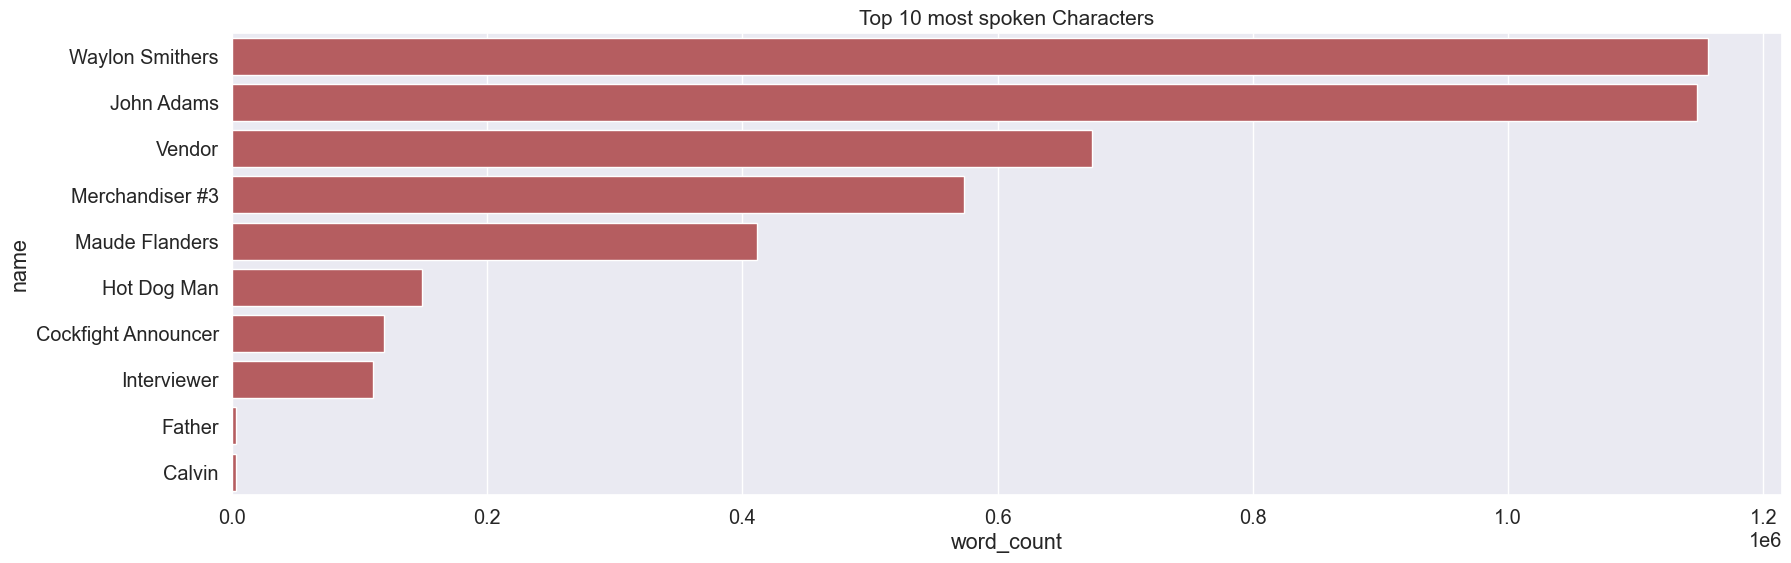

In [181]:
# First plot: Top 10 characters by word count
sns.set(style="whitegrid")

sns.set(font_scale=1.3)  
sns.barplot(x='word_count', y='name', data=topCharacters_by_word.head(10), color="r")            
plt.title("Top 10 most spoken Characters", size=15)
fig=plt.gcf()
fig.set_size_inches(20,6)
plt.show()
# Hint: Try to use the integration of matplotlib and pandas to directly plot from a dataframe.

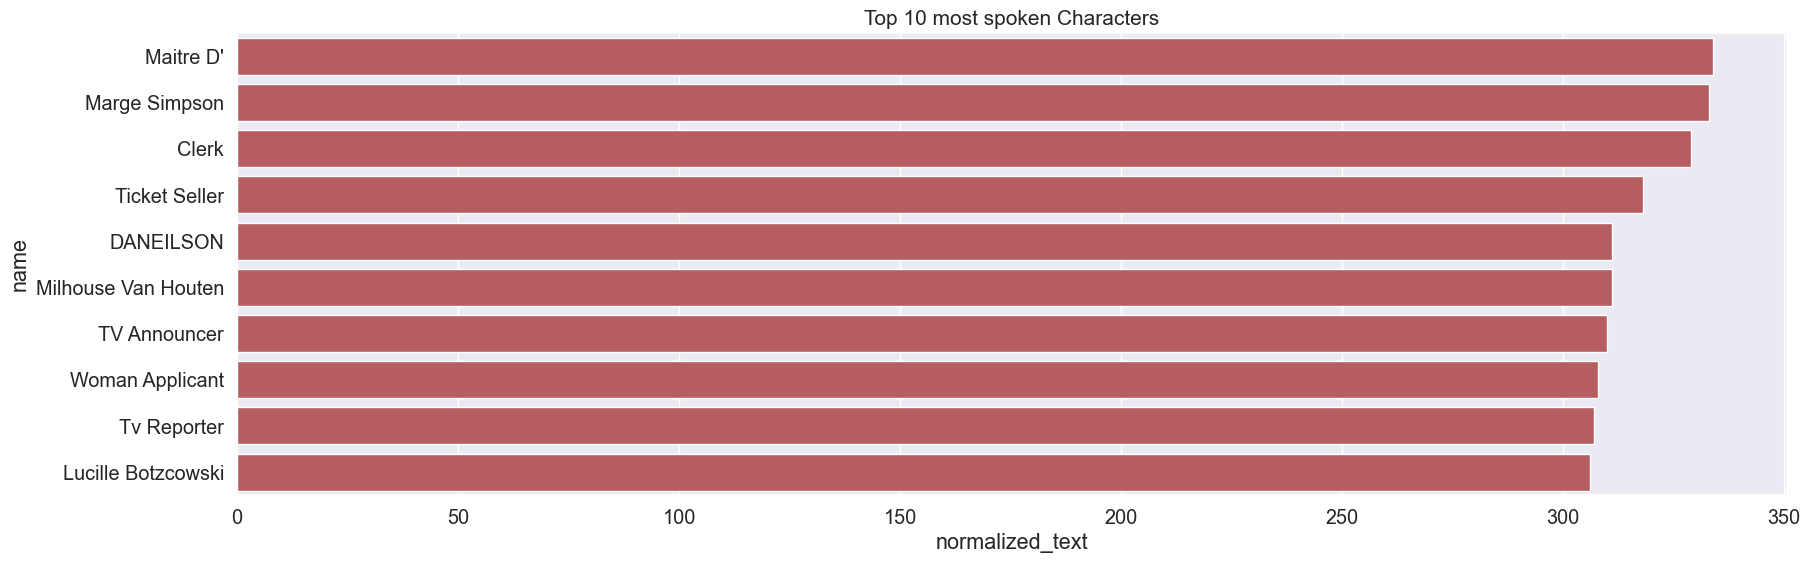

In [190]:
# Second plot: Top 10 characters by lines
sns.set(style="whitegrid")

sns.set(font_scale=1.3)  
sns.barplot(x='normalized_text', y='name', data=topCharacters_by_line.head(10), color="r")            
plt.title("Top 10 most spoken Characters", size=15)
fig=plt.gcf()
fig.set_size_inches(20,6)
plt.show()

Compare the results of the two plots: What do you notice? Do the results look correct to you?

### Your answer here

### 3. Common Words (3 points)

We continue by examining the dialogues in more detail, by looking at the top 20 most commonly appearing words (tokens).

To generate a meaningful output, use the following pre-processing pipeline, parts of which were explained in more detail during the tutorials and the lecture:
- Use spaCy (`en_core_web_sm`) to process all text.
- Instead of considering the raw text, use the lemmatized token provided by spaCy.
- Additionally, ignore any token that is classified as punctuation by spaCy.
- Also skip any token which is classified as a stop word by spaCy.

In [147]:
nlp = spacy.load('en_core_web_sm', disable=['ner'])
#df_char_script['raw_text_sen'] = df_char_script['raw_text'].apply(lambda x: list(nlp(x).sents))

In [148]:


word_list =[]
df_script['lemm_spoken_words']=df_script["spoken_words"].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))
# Iterate over the spoken words (Hint: df_script) and append the lemmatized tokens as detailed above
### Your code here
print(type(df_script['lemm_spoken_words'][0]))
#op
spacy.tokens.doc.Doc






<class 'str'>


spacy.tokens.doc.Doc

In [149]:
from collections import Counter
word_list = df_script['lemm_spoken_words'].to_list()
word_counter = Counter(word_list)
most_comm_list = word_counter.most_common(20)


In [150]:
most_comm_list
df = pd.DataFrame(most_comm_list,columns=['word','count'])
df

,word,count
0,no .,305
1,what ?,143
2,okay .,139
3,yes .,130
4,huh ?,128
5,Woo hoo !,124
6,yeah .,120
7,homer !,108
8,no !,105
9,uh - oh .,104


Now plot a graph with the top 20 words on the x-axis and their respective frequencies on the y-axis, similar to the previous question.

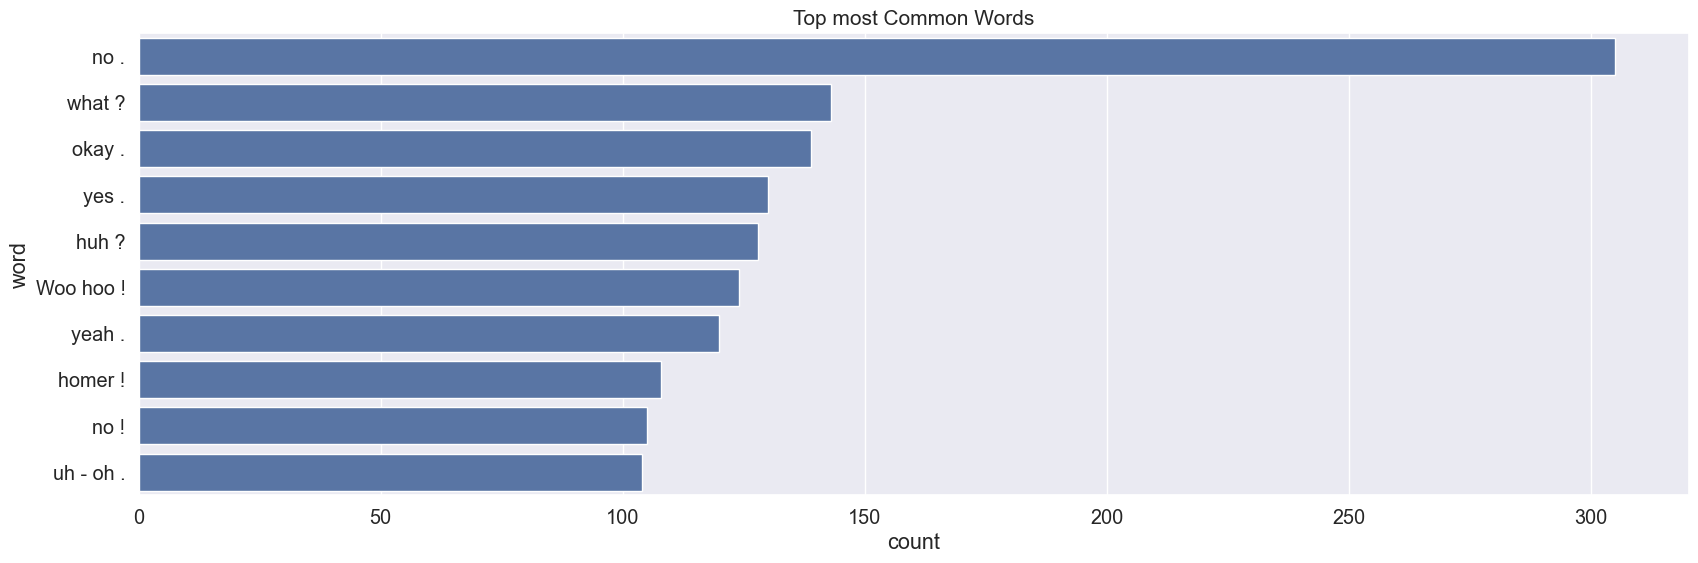

In [151]:
# Provide a plot of the frequencies of the most common 20 words.
import seaborn as sns
sns.set(style="whitegrid")

sns.set(font_scale=1.3)  
sns.barplot(x='count', y='word', data=df.head(10), color="b")            
plt.title("Top most Common Words", size=15)
fig=plt.gcf()
fig.set_size_inches(20,6)
plt.show()

### 4. Named Entity Wordcloud (2 points)

Apply named entity recognition (NER) using SpaCy and generate a word cloud of the most commonly appearing 50
named entities that have the type `PERSON`. Visualize the resulting entities in a word cloud.
Take into account that you cannot simply use the 
output of the previous task, since NER was explicitly disabled.
 Since the named entity recognition takes quite some time, use only the first `10000` scripts.

In [138]:
df_script['spoken_words'].isnull().sum()

0

In [139]:
# Load the English spacy model again, but this time do not disable the NER module.
import pprint
nlp = spacy.load('en_core_web_sm')
# Extract named entities of the type "PERSON" from each script.
val = []
for script in df_script.spoken_words.tolist()[:10000]:
    val.append([(ent.text,ent.label_) for ent in nlp(script).ents])
    #print([(X.text, X.label_) for X in doc.ents])

In [140]:
len(val)

10000

In [141]:
def person(v):
    r = [(x,y) for x,y in v if ('PERSON' == y)]
    return [(x) for x,y in r]
sol = person(val[1])

In [142]:
sol

['Bergstrom']

In [ ]:
#df_script1 = df_script[:10000]
#def all_ents(v):
#        return [(ent.text, ent.label_) for ent in nlp(v).ents]

#df_script1['Entities'] = df_script1['spoken_words'].apply(lambda v: all_ents(v))

#df_script1.head()

To visualize the word cloud, you may use the `wordcloud` package, which works in combination with `matplotlib`. Make sure to limit the number of visible words to 50, and the maximum font size to 60.

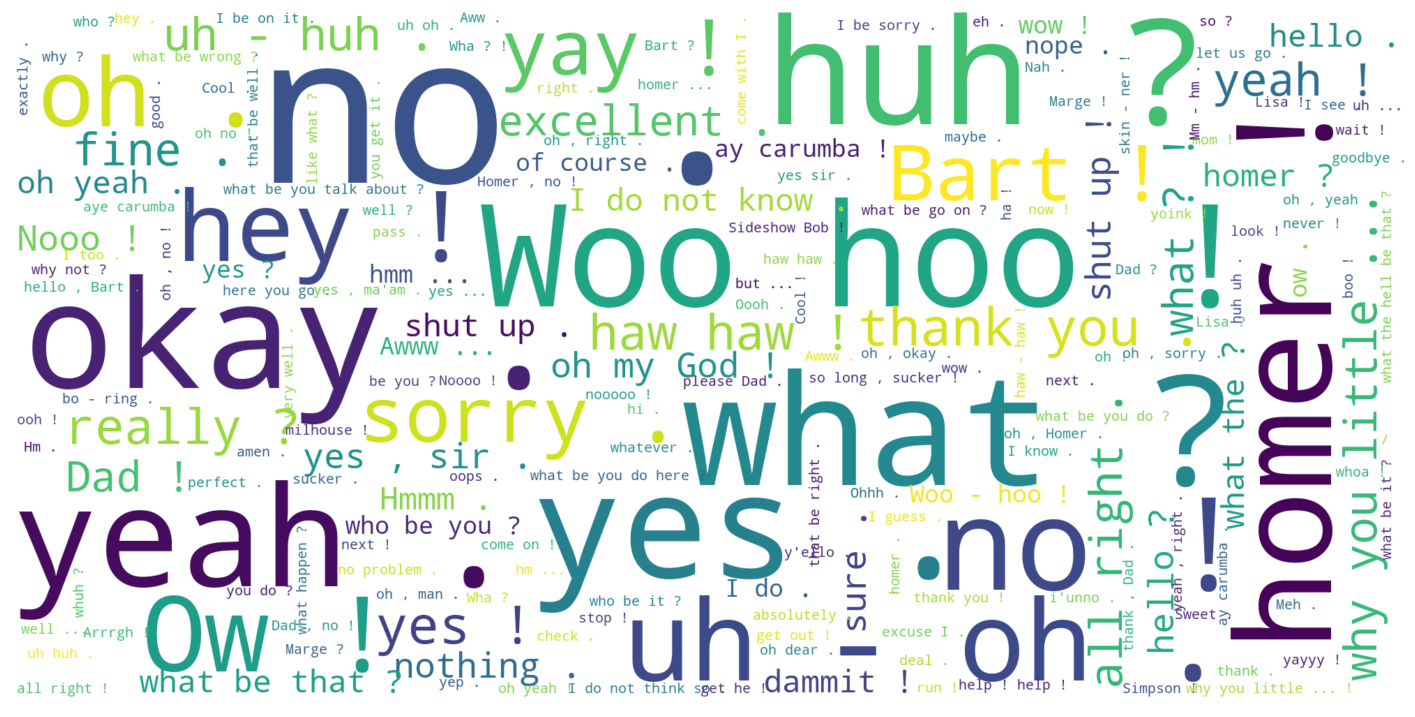

In [153]:
#wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=60, 
        scale=5,
        random_state=1 
    ).generate_from_frequencies(data)

    fig = plt.figure(1, figsize=(18, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()

show_wordcloud(word_counter)

### 5. Normalized Word Importance with TF-IDF (6 points)

The top words so far seem not too informative. We wish to find out the importance of particular words for specific characters, by looking at normalized frequency counts.
As an example, we expect the younger Simpson family members to exhibit a disproportionate frequency for the word "mom" or "dad", compared to other characters.

We looked at the normalization through Term Frequency - Inverse Document Frequency (TF-IDF) in the lecture, which we will use here to investigate lines by `Lisa Simpson` and `Bart Simpson`.

In this case, each script line is a document for a certain character who spoke the words.
Use `CountVectorizer` and `TfidfTransformers` from the `scikit-learn` library. In addition, filter out stop words and words with a frequency of less than 5 occurrences from the analysis. Then plot the TF-IDF values for the top 10 words for Lisa and Bart as bar plots.

In [155]:
df_char_script1 = df_char_script[['normalized_name','normalized_text','word_count']]
df_char_script1

,normalized_name,normalized_text,word_count
0,children,whatd you say,3
1,children,is it used,3
2,children,wahhhhhhhhh,1
3,children,yahhhhhhhh,1
4,children,rusty old hunk of junk,5
...,...,...,...
130248,security guard,well so long springfield,4
130249,security guard,where are you going,4
130250,security guard,oh nowheres in particular i just need some tim...,11
130251,security guard,hey there you are gimme that contraption back ...,18


In [156]:
df_char_script_bart = df_char_script1[df_char_script1['normalized_name']=="bart simpson"]

In [157]:
df_char_script_bart

,normalized_name,normalized_text,word_count
17376,bart simpson,five finger discount man,4
17377,bart simpson,you know bart when i was your age i pulled a f...,30
17378,bart simpson,look there it is the head,6
17379,bart simpson,kill him,2
17380,bart simpson,theyve got us cornered boy well never get away...,13
...,...,...,...
17644,bart simpson,look its glorious,3
17645,bart simpson,its beautiful man,3
17646,bart simpson,i love you smithers,4
17647,bart simpson,the feeling is more than mutual sir,7


In [158]:
df_char_script_bart = df_char_script_bart.dropna(subset=['normalized_text'])

In [159]:

from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)    
nlp = spacy.load('en_core_web_sm')

df_char_script_bart['token_normalized_text'] = df_char_script_bart['normalized_text'].parallel_apply(lambda x: nlp(x))

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [160]:
df_char_script_bart

,normalized_name,normalized_text,word_count,token_normalized_text
17376,bart simpson,five finger discount man,4,"(five, finger, discount, man)"
17377,bart simpson,you know bart when i was your age i pulled a f...,30,"(you, know, bart, when, i, was, your, age, i, ..."
17378,bart simpson,look there it is the head,6,"(look, there, it, is, the, head)"
17379,bart simpson,kill him,2,"(kill, him)"
17380,bart simpson,theyve got us cornered boy well never get away...,13,"(they, ve, got, us, cornered, boy, well, never..."
...,...,...,...,...
17644,bart simpson,look its glorious,3,"(look, its, glorious)"
17645,bart simpson,its beautiful man,3,"(its, beautiful, man)"
17646,bart simpson,i love you smithers,4,"(i, love, you, smithers)"
17647,bart simpson,the feeling is more than mutual sir,7,"(the, feeling, is, more, than, mutual, sir)"


In [161]:
def remove_stops(tokens):
    return [token.text for token in tokens if not token.is_stop]
df_char_script_bart['No_Stop_text'] = df_char_script_bart['token_normalized_text'].apply(remove_stops)

In [162]:
df_char_script_bart['text_string'] = df_char_script_bart['No_Stop_text'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [163]:
df_char_script_bart

,normalized_name,normalized_text,word_count,token_normalized_text,No_Stop_text,text_string
17376,bart simpson,five finger discount man,4,"(five, finger, discount, man)","[finger, discount, man]",finger discount man
17377,bart simpson,you know bart when i was your age i pulled a f...,30,"(you, know, bart, when, i, was, your, age, i, ...","[know, bart, age, pulled, boners, think, ll, f...",know bart age pulled boners think find people ...
17378,bart simpson,look there it is the head,6,"(look, there, it, is, the, head)","[look, head]",look head
17379,bart simpson,kill him,2,"(kill, him)",[kill],kill
17380,bart simpson,theyve got us cornered boy well never get away...,13,"(they, ve, got, us, cornered, boy, well, never...","[ve, cornered, boy, away, head]",cornered boy away head
...,...,...,...,...,...,...
17644,bart simpson,look its glorious,3,"(look, its, glorious)","[look, glorious]",look glorious
17645,bart simpson,its beautiful man,3,"(its, beautiful, man)","[beautiful, man]",beautiful man
17646,bart simpson,i love you smithers,4,"(i, love, you, smithers)","[love, smithers]",love smithers
17647,bart simpson,the feeling is more than mutual sir,7,"(the, feeling, is, more, than, mutual, sir)","[feeling, mutual, sir]",feeling mutual sir


In [35]:
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


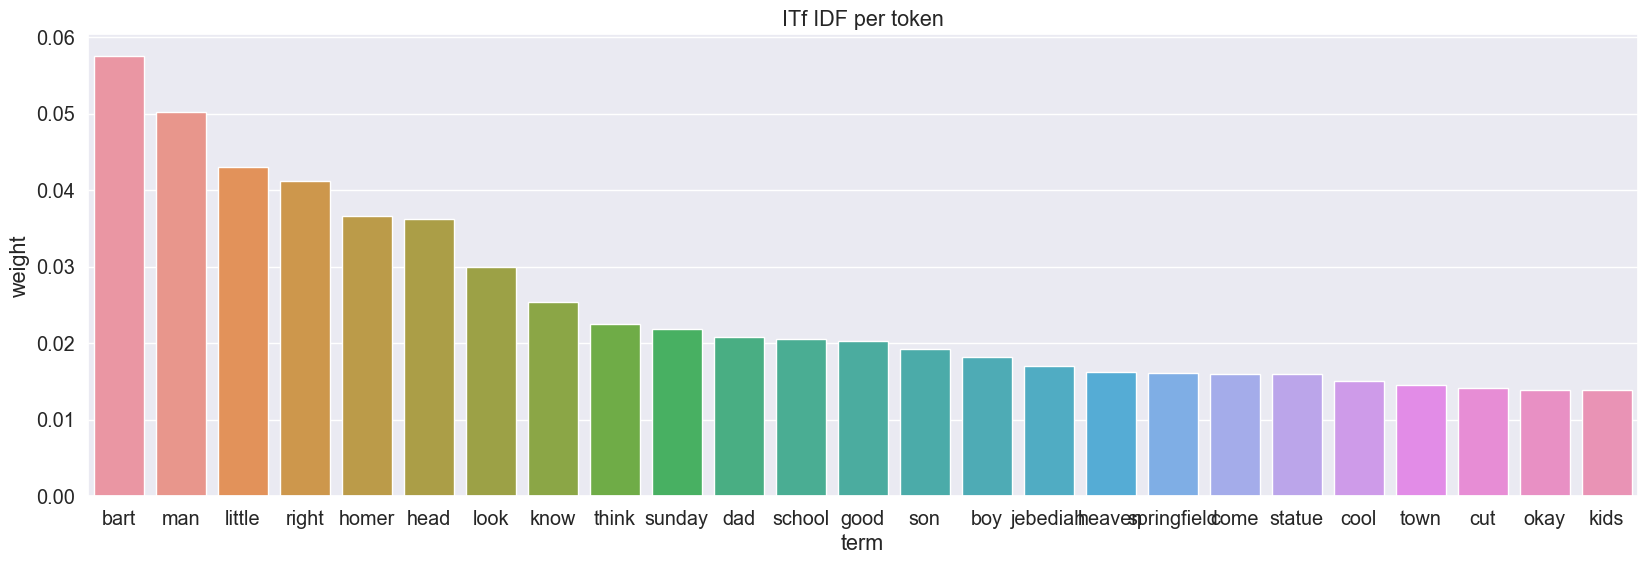

: 

In [190]:
cvec = CountVectorizer(stop_words="english", analyzer='word', ngram_range=(1, 2), max_df=1.0, min_df=5)
sf = cvec.fit_transform(df_char_script_bart['text_string'])
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
weights_df = weights_df.sort_values("weight", ascending=False).reset_index(drop=False)

sns.barplot(x='term', y='weight', data=weights_df.head(25))            
plt.title("ITf IDF per token")
fig=plt.gcf()
fig.set_size_inches(20, 6)
plt.show()

In [177]:
# Lisa 
df_char_script_Lisa = df_char_script1[df_char_script1['normalized_name']=="lisa simpson"]

In [178]:
df_char_script_Lisa

,normalized_name,normalized_text,word_count
17649,lisa simpson,no,1
17650,lisa simpson,good,1
17651,lisa simpson,does not,2
17652,lisa simpson,does too,2
17653,lisa simpson,i think she likes my present better,7
...,...,...,...
17944,lisa simpson,what a lovely surprise youre here to see me right,10
17945,lisa simpson,of course,2
17946,lisa simpson,hey way to go homer way to go,8
17947,lisa simpson,hey whatll i tell the boss,6


In [179]:
df_char_script_Lisa = df_char_script_Lisa.dropna(subset=['normalized_text'])

In [180]:

pandarallel.initialize(progress_bar=True)    
nlp = spacy.load('en_core_web_sm')

df_char_script_Lisa['token_normalized_text'] = df_char_script_Lisa['normalized_text'].parallel_apply(lambda x: nlp(x))

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [181]:
def remove_stops(tokens):
    return [token.text for token in tokens if not token.is_stop]
df_char_script_Lisa['No_Stop_text'] = df_char_script_Lisa['token_normalized_text'].apply(remove_stops)

In [182]:
df_char_script_Lisa['text_string'] = df_char_script_Lisa['No_Stop_text'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [183]:
df_char_script_Lisa

,normalized_name,normalized_text,word_count,token_normalized_text,No_Stop_text,text_string
17649,lisa simpson,no,1,(no),[],
17650,lisa simpson,good,1,(good),[good],good
17651,lisa simpson,does not,2,"(does, not)",[],
17652,lisa simpson,does too,2,"(does, too)",[],
17653,lisa simpson,i think she likes my present better,7,"(i, think, she, likes, my, present, better)","[think, likes, present, better]",think likes present better
...,...,...,...,...,...,...
17944,lisa simpson,what a lovely surprise youre here to see me right,10,"(what, a, lovely, surprise, you, re, here, to,...","[lovely, surprise, right]",lovely surprise right
17945,lisa simpson,of course,2,"(of, course)",[course],course
17946,lisa simpson,hey way to go homer way to go,8,"(hey, way, to, go, homer, way, to, go)","[way, homer, way]",way homer way
17947,lisa simpson,hey whatll i tell the boss,6,"(hey, what, ll, i, tell, the, boss)","[ll, tell, boss]",tell boss


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


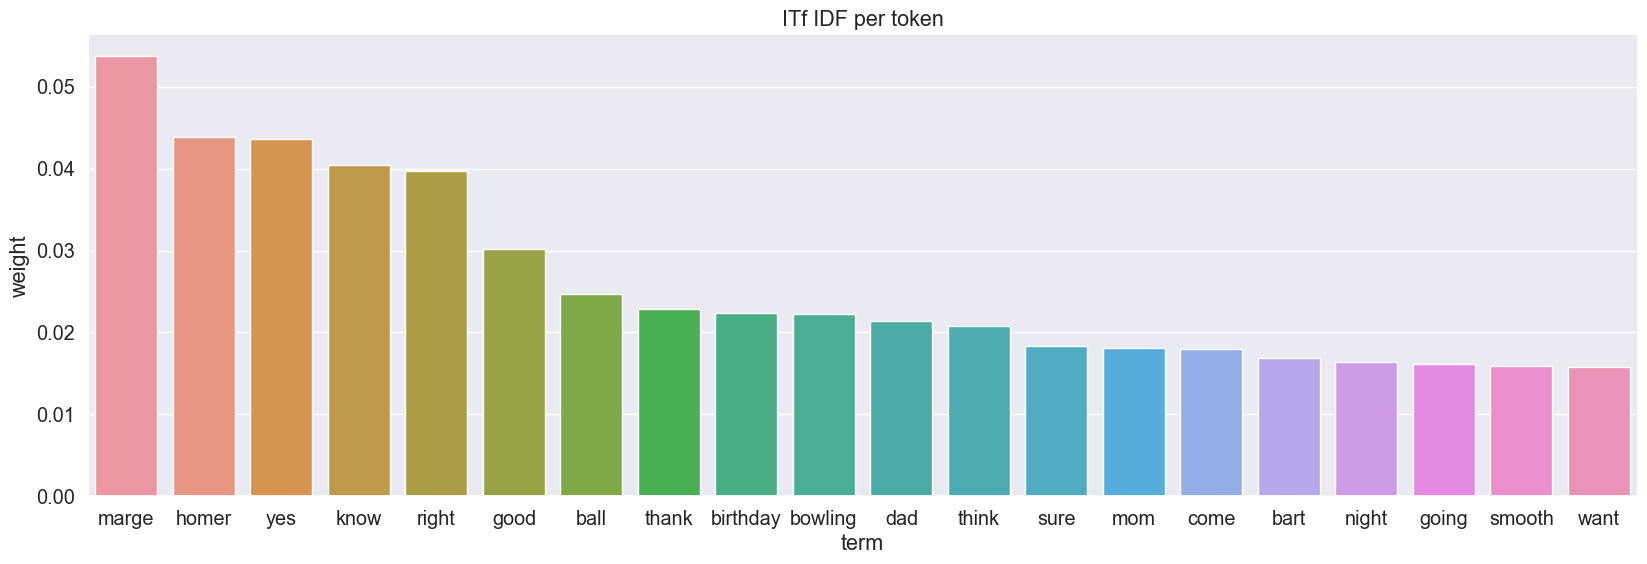

In [186]:
cvec = CountVectorizer(stop_words="english", analyzer='word', ngram_range=(1, 2), max_df=1.0, min_df=5)
sf = cvec.fit_transform(df_char_script_Lisa['text_string'])
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
weights_df = weights_df.sort_values("weight", ascending=False).reset_index(drop=False)

sns.barplot(x='term', y='weight', data=weights_df.head(20))            
plt.title("ITf IDF per token")
fig=plt.gcf()
fig.set_size_inches(20, 6)
plt.show()

Do your results look correct?

### With respect to bart and lisa episodes(spoken words), they havnt used 'mom' and 'dad' in the top 10 occurances of the spoken works 

By using `CountVectorizer` over the concatenation of all character-specific lines, we can then also compute a (non-normalized) document similarity between the lines of Lisa and Bart. Use cosine similarity over the two document vectors to compare the similarity.

For the `CountVectorizer`, use the same arguments as before (minimum 5 occurrences and no stop words).

In [18]:
from sklearn.metrics.pairwise import cosine_similarity



### Your code

### 6. NNMF Topics (5 points)

Uncover interesting topics by using non-negative matrix factorization (NNMF or NMF).

Use the `NMF` implementation from `sklearn` to detect the topics in the scripts, and use text cleaning steps similar to the first task. However, this time perform no lemmatization:
- Use spaCy (`en_core_web_sm`) to process all text.
- Additionally, ignore any token that is classified as punctuation by spaCy.
- Also skip any token which is classified as a stop word by spaCy.

Set the `max_features` of `CountVectorizer` to 10,000 and `random_state` of the `NMF` to 42, and `n_components=10`.

In [20]:
from sklearn.decomposition import NMF 



In [ ]:
# Clean the documents according to the specifications

In [ ]:
# Apply the NNMF method as specified above

In [22]:
def show_topics(components,num_top_words,vocab):
    #for each component or topic sorts the row values from large to small and 
    # returns the top words as the representation of the topic.
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in components])
    return [' '.join(t) for t in topic_words]

Use the `show_topics` method to show the top-20 words for the top 2 topics.

In [ ]:
### Your code

## Question 2-2: Boosting results in Elasticsearch (1 + 9 + 2 = 12 points)

Before you start, make sure to download the file `test_data.json`, available on [Moodle](https://moodle.uni-heidelberg.de/pluginfile.php/1006481/mod_label/intro/test-data.json). This question assumes you have a running installation of Elasticsearch 7.X on your machine. If not, make sure to follow the steps detailed in the first tutorial to set up an instance. To complete the following questions, you will have to adjust the given URLs with your own settings. Look out for mentions of `<login>`, `<password>` and `<port>` and replace them accordingly.

Bulk load the content of `test_data.json` into an index called `dishes`. You may use the following shell command:

```bash
curl -u elastic:1234 -H "Content-Type:application/x-ndjson" -XPOST http://localhost:9200/dishes/_bulk --data-binary "@test_data.json"
```
1. Provide a command to extract the dynamic mapping that is created in this scenario. Make sure that the output mapping is included in your solution (potentially pasting it into another cell or execute through the ).

### Insert your answer here
Hint: Consider using the option `?pretty` for legible outputs

In [2]:
%system docker compose up "-d"

['Container es_python_demo-es01-1  Created',
 'Container es_python_demo-es01-1  Starting',
 'Error response from daemon: driver failed programming external connectivity on endpoint es_python_demo-es01-1 (d36b250b49175716397ee66210a93b8eefcc5958eceff0c498db086283d02a88): listen tcp4 0.0.0.0:9200: bind: address already in use']

In [2]:
%pip install "requests==2.28.1"

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from urllib.parse import urljoin
import requests

es_host = "http://localhost:9200"
es_user = "elastic"
es_password = "1234"

dishes_index = "dishes"

indices = [(dishes_index, "/Users/anureddy/Desktop/Sem01/DataScience_for_text_analytics/Assignments/Assignment02/Assignment_02/test-data.json")]

for index_name, file_name in indices:
    with open(file_name) as file:
        response = requests.post(
            urljoin(es_host, f"{index_name}/_bulk"),
            auth=(es_user, es_password),
            data=file.read(),
            headers={"Content-Type": "application/x-ndjson"},
        )
    print(f"{index_name}: {response.status_code}")


dishes: 200


In [4]:
from urllib.parse import urljoin
import requests

response = requests.get(    # make GET requests
    # set target url -> http://localhost:9200/products/_search
    urljoin(es_host, f"{dishes_index}/_search"),
    auth=(es_user, es_password),    # add credentials for basic authentication
)
response.json()


{'took': 258,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 21, 'relation': 'eq'},
  'max_score': 1.0,
  'hits': [{'_index': 'dishes',
    '_type': '_doc',
    '_id': '1',
    '_score': 1.0,
    '_ignored': ['description.keyword', 'steps.keyword'],
    '_source': {'title': 'Fast and Easy Pasta With Blistered Cherry Tomato Sauce',
     'description': "Cherry tomatoes are almost always sweeter, riper, and higher in pectin than larger tomatoes at the supermarket. All of these factors mean that cherry tomatoes are fantastic for making a rich, thick, flavorful sauce. Even better: It takes only four ingredients and about 10 minutes, start to finish—less time than it takes to cook the pasta you're gonna serve it with.",
     'preparation_time_minutes': 12,
     'servings': {'min': 4, 'max': 6},
     'steps': ['Place pasta in a large skillet or sauté pan and cover with water and a big pinch of salt. Bring to a boil over 

2. Write queries to the `dishes` index given the specified criteria. The matching documents should be included in your solution, including their respective scores.

a) Return all dishes that have a preparation time of less than 15 minutes

In [19]:
for item in response.json()["hits"]["hits"]:
    # print ID of a document and the corresponding product name
    print(f"ID: {item['_id']}, name: {item['_source']['title']}")

print(
    f"\nTotal documents matching the search: {response.json()['hits']['total']['value']}")
print(
    f"Number of documents in the response: {len(response.json()['hits']['hits'])}")


ID: 11, name: Spaghetti Puttanesca (Pasta or Spaghetti With Capers, Olives, and Anchovies)
ID: 6, name: Spaghetti Aglio e Olio Recipe
ID: 4, name: Shrimp Fra Diavolo (Spaghetti With Spicy Tomato Sauce)
ID: 7, name: Cacio e Pepe (Spaghetti With Black Pepper and Pecorino Romano)

Total documents matching the search: 4
Number of documents in the response: 4


In [42]:
response = requests.get(
    urljoin(es_host, f"{dishes_index}/_search"),
    auth=(es_user, es_password),
    params={"size": "15"},  # retrieve 15 documents
    json={
        "query": {

"range":{
                    "preparation_time_minutes":{
                        "lte": '15'
                    } 
            }
        }
    }
)
for item in response.json()["hits"]['hits']:
    print(f"ID: {item['_id']}, name: {item['_source']['title']}, preparation_time_minutes: {item['_source']['preparation_time_minutes']}")

print(
    f"\nTotal documents matching the search: {response.json()['hits']['total']['value']}")
print(
    f"Number of documents in the response: {len(response.json()['hits']['hits'])}")


ID: 1, name: Fast and Easy Pasta With Blistered Cherry Tomato Sauce, preparation_time_minutes: 12
ID: 5, name: Stovetop Macaroni and Cheese, preparation_time_minutes: 8
ID: 6, name: Spaghetti Aglio e Olio Recipe, preparation_time_minutes: 10
ID: 7, name: Cacio e Pepe (Spaghetti With Black Pepper and Pecorino Romano), preparation_time_minutes: 15
ID: 10, name: Penne With Hot-As-You-Dare Arrabbiata Sauce, preparation_time_minutes: 15
ID: 11, name: Spaghetti Puttanesca (Pasta or Spaghetti With Capers, Olives, and Anchovies), preparation_time_minutes: 15
ID: 13, name: Pesto Pasta With Potatoes and Green Beans, preparation_time_minutes: 15
ID: 15, name: Lighter Tuna Noodle Casserole, preparation_time_minutes: 15

Total documents matching the search: 8
Number of documents in the response: 8


b) All dishes that contain `spaghetti` in the title.

In [43]:
response = requests.get(
    urljoin(es_host, f"{dishes_index}/_search"),
    auth=(es_user, es_password),
    #params={"size": "50"},  # retrieve 15 documents
    json={
        "query": {

"match":{
                    "title":"Spaghetti or spaghetti"
                    }
        }
    }
)
for item in response.json()["hits"]['hits']:
    print(f"ID: {item['_id']}, title: {item['_source']['title']}")

print(
    f"\nTotal documents matching the search: {response.json()['hits']['total']['value']}")
print(
    f"Number of documents in the response: {len(response.json()['hits']['hits'])}")

ID: 11, title: Spaghetti Puttanesca (Pasta or Spaghetti With Capers, Olives, and Anchovies)
ID: 6, title: Spaghetti Aglio e Olio Recipe
ID: 4, title: Shrimp Fra Diavolo (Spaghetti With Spicy Tomato Sauce)
ID: 7, title: Cacio e Pepe (Spaghetti With Black Pepper and Pecorino Romano)

Total documents matching the search: 4
Number of documents in the response: 4


### Insert your answer here

c) All dishes that received at least one 5-star rating and were created after 2016.

In [44]:
response = requests.get(
    urljoin(es_host, f"{dishes_index}/_search"),
    auth=(es_user, es_password),
    #params={"size": "50"},  # retrieve 15 documents
    json={
  "query": {
    "bool": {
      "must": [
        {
          "match": {
            "ratings": 5.0
          }
        },
        {
          "range": {
            "created":{
              "gte":"2017/01/01"
          }
        }
        }
      ]
    }
  } 
})
for item in response.json()["hits"]['hits']:
    print(f"ID: {item['_id']}, title: {item['_source']['ratings']}, Date:{item['_source']['created']}")

print(
    f"\nTotal documents matching the search: {response.json()['hits']['total']['value']}")
print(
    f"Number of documents in the response: {len(response.json()['hits']['hits'])}")

ID: 1, title: [4.5, 5.0, 3.0, 4.5], Date:2017/03/29
ID: 10, title: [1.5, 2.0, 4.0, 3.5, 3.0, 5.0, 1.5], Date:2017/04/27

Total documents matching the search: 2
Number of documents in the response: 2


### Insert your answer here

d) Dishes that serve between 6 to 8 people.

In [51]:
response = requests.get(
    urljoin(es_host, f"{dishes_index}/_search"),
    auth=(es_user, es_password),
    #params={"size": "50"},  # retrieve 15 documents
    json={
    "query": {
        "bool": {
            "must": [
                {
                    "match": {
                        "servings.max": "8"
                    }
                },
                {
                    "match": {
                        "servings.min": "6"
                    }
                }
            ]
        }
    }
})
for item in response.json()["hits"]["hits"]:
  print(f"ID: {item['_id']}, servings_min: {item['_source']['servings']['min']},servings_min: {item['_source']['servings']['max']}")
  
print(
    f"\nTotal documents matching the search: {response.json()['hits']['total']['value']}")
print(
    f"Number of documents in the response: {len(response.json()['hits']['hits'])}")

ID: 20, servings_min: 6,servings_min: 8

Total documents matching the search: 1
Number of documents in the response: 1


e) Dishes that mention both of the phrases "pasta" and "parmigiano" in the instructions.

In [8]:
response = requests.get(
    urljoin(es_host, f"{dishes_index}/_search"),
    auth=(es_user, es_password),
    #params={"size": "50"},  # retrieve 15 documents
    json={
  "query": {
    "match": {
      "steps": {
        "query": "pasta parmigiano",
        "operator": "and"
      }
    }
  }
})
for item in response.json()["hits"]["hits"]:
  print(f"ID: {item['_id']}, servings_min: {item['_source']['steps']}")
  
print(
    f"\nTotal documents matching the search: {response.json()['hits']['total']['value']}")
print(
    f"Number of documents in the response: {len(response.json()['hits']['hits'])}")

ID: 13, servings_min: ['In a large pot of salted boiling water, boil pasta, potato, and green beans until pasta is al dente and potato and green beans are very tender. Drain, reserving 1 cup cooking water, and transfer pasta, potato, and green beans to a large mixing or serving bowl.', 'Add pesto sauce to pasta along with 1/4 cup pasta cooking water. Toss well to emulsify pesto and pasta water into a creamy sauce. Add more pasta water, 1 tablespoon at a time, as needed, if pasta is too dry. Drizzle in fresh olive oil, if desired. Serve with Parmigiano Reggiano on the side.']
ID: 20, servings_min: ['Place pasta in a large bowl and cover with hot water. Season generously with salt. Let rest, stirring twice during the first 10 minutes, while you prepare the other ingredients.', 'Use a hand blender or countertop blender to process tomatoes until mostly smooth, but still a little chunky. Set aside 3/4 cup of tomatoes. Combine remaining tomatoes, heavy cream, and chicken stock in a medium bo

### Insert your answer here

f) All recipes that require more than 10 ingredients

In [10]:
response = requests.get(
    urljoin(es_host, f"{dishes_index}/_search"),
    auth=(es_user, es_password),
    #params={"size": "50"},  # retrieve 15 documents
    json={ 
  "aggs": {
    "more_than_10_incredients": {
      "count": {
        "field": "ingredients.name",
        "size": 11
      }
    }
  }
})
for item in response.json()["hits"]["hits"]:
  print(f"ID: {item['_id']}, Ingredients: {item['_source']['ingredients']}")
  
print(
    f"\nTotal documents matching the search: {response.json()['hits']['total']['value']}")
print(
    f"Number of documents in the response: {len(response.json()['hits']['hits'])}")

KeyError: 'hits'

### Insert your answer here

g) Extend your query from b), such that it searches for `spaghetti` in both the title *and* description field. Occurrences in the title field should be boosted by a factor of 3.

In [13]:
response = requests.get(
    urljoin(es_host, f"{dishes_index}/_search"),
    auth=(es_user, es_password),
    #params={"size": "50"},  # retrieve 15 documents
    json={
  "query": {
    "bool": {
      "must": [
        {
    "multi_match" : {
      "query":    "spaghetti", 
      "fields": [ "title", "description" ],
      "operator": "and", 
      "boost": 3}
        }
      ]
    }
    }
  })
for item in response.json()["hits"]["hits"]:
  print(f"ID: {item['_id']}, title: {item['_source']['title']}, description:{item['_source']['description']}")
  
print(
    f"\nTotal documents matching the search: {response.json()['hits']['total']['value']}")
print(
    f"Number of documents in the response: {len(response.json()['hits']['hits'])}")

ID: 7, title: Cacio e Pepe (Spaghetti With Black Pepper and Pecorino Romano), description:If you were to watch a practiced hand make cacio e pepe, you might think the instructions were as simple as this: Cook spaghetti and drain. Toss with olive oil, butter, black pepper, and grated Pecorino Romano cheese. Serve. But we all know that the simplest recipes can often be the most confounding, and so it is with cacio e pepe. Follow those instructions and, if you're lucky, you'll get what you're after: a creamy, emulsified sauce that coats each strand of spaghetti with flavor. More likely, you're gonna get what I (and, from the stories I've heard, many others as well) got on the first few tries—spaghetti in a thin, greasy sauce, or spaghetti with clumps of cheese that refuse to melt. Or, worse, both at the same time. Here's how to make it perfectly every time.
ID: 11, title: Spaghetti Puttanesca (Pasta or Spaghetti With Capers, Olives, and Anchovies), description:"Puttanesca" literally trans

### Insert your answer here

3. The default analyzer might not be perfect for working with recipe data. Provide the definition of a custom analyzer which adheres to the following specifications:
   
   - It performs *no* stop word filtering.
   - It applies stemming to all tokens.
   - It does *not* lowercase tokens, but  

In [31]:
index_name = "customs_settings"
# response = requests.put(
#             urljoin(es_host, f"{index_name}"),
#             auth=(es_user, es_password))

In [15]:
from elasticsearch import Elasticsearch
es_host = "http://localhost:9200"
es_user = "elastic"
es_password = "1234"

es = Elasticsearch(
    hosts=es_host,  # "http://localhost:9200"
    basic_auth=(es_user, es_password)   # credentials for basic authentication
)

es.info() 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/elasticsearch/connection/base.py:200: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  warnings.warn(message, category=ElasticsearchWarning)


{'name': 'ee7bd0162a36',
 'cluster_name': 'docker-cluster',
 'cluster_uuid': '_yDGIBeZSje84p5tzBDI0A',
 'version': {'number': '7.17.7',
  'build_flavor': 'default',
  'build_type': 'docker',
  'build_hash': '78dcaaa8cee33438b91eca7f5c7f56a70fec9e80',
  'build_date': '2022-10-17T15:29:54.167373105Z',
  'build_snapshot': False,
  'lucene_version': '8.11.1',
  'minimum_wire_compatibility_version': '6.8.0',
  'minimum_index_compatibility_version': '6.0.0-beta1'},
 'tagline': 'You Know, for Search'}

In [30]:
existing_indices = es.cat.indices()
existing_indices

'yellow open  slang_test                      55FjqCMdRammtrHJxmFTGg 1 1    0     0    226b    226b\nyellow open  recipes                         YORpJgfpTwO8ephQAqW1gA 1 1   21     0  78.6kb  78.6kb\nyellow open  test                            0urX_9UhTmWOEt2ygMYPvw 1 1    0     0    226b    226b\ngreen  open  .kibana_task_manager_7.17.7_001 18HnTJvqRSi_sfg3Vwnovg 1 0   17 29478   5.9mb   5.9mb\nyellow open  slang-demo                      n60QyKJZQZGh-9kIjvjHbw 1 1 3357     0 363.3kb 363.3kb\ngreen  open  .apm-agent-configuration        pmi_bCQvRs6neg7C-eRkaA 1 0    0     0    226b    226b\nyellow close dishes                          _HQpI37HSwGXm3HQ_k4Uuw 1 1                           \nyellow open  slang1                          vJlKbQvIRyCAHGo-gTwIlw 1 1    1     0   2.1mb   2.1mb\ngreen  open  .tasks                          2U_TKzE7SX-0wOwPipgo7Q 1 0   18     1  60.1kb  60.1kb\nyellow open  products                        pf1UfEcnSs2Ijl4GNw5W4w 1 1 1000     0 360.2kb 360.2kb\

In [17]:
# #intially close the index 
# response = requests.post(
#     urljoin(es_host, f"{dishes_index}/_close"),
#     auth=(es_user, es_password))

In [ ]:
es.indices.create(
    index=index_name,
    body={
      'settings': {
        'number_of_shards': 1,
        'number_of_replicas': 0,

        # custom analyzer based on the specifications given in the question
   "analyzer": {    
      "my_analyzer":{
      "tokenizer":"standard",
      "filter": "my_stemmer"
}
},
 "filter": {
        "my_stemmer": {
          "type": "stemmer",
          "language": "light_english"
        }
      }
      }
    },
    # Will ignore 400 errors, remove to ensure you're prompted
    ignore=400
)

In [28]:
body={
        "analyzer": "my_analyzer",
        "text": "Tom and jerry is a good show ",
}

In [29]:

result = es.indices.analyze(index=index_name, body=body)
result

{'tokens': [{'token': 'Tom',
   'start_offset': 0,
   'end_offset': 3,
   'type': '<ALPHANUM>',
   'position': 0},
  {'token': 'and',
   'start_offset': 4,
   'end_offset': 7,
   'type': '<ALPHANUM>',
   'position': 1},
  {'token': 'jerry',
   'start_offset': 8,
   'end_offset': 13,
   'type': '<ALPHANUM>',
   'position': 2},
  {'token': 'is',
   'start_offset': 14,
   'end_offset': 16,
   'type': '<ALPHANUM>',
   'position': 3},
  {'token': 'a',
   'start_offset': 17,
   'end_offset': 18,
   'type': '<ALPHANUM>',
   'position': 4},
  {'token': 'good',
   'start_offset': 19,
   'end_offset': 23,
   'type': '<ALPHANUM>',
   'position': 5},
  {'token': 'show',
   'start_offset': 24,
   'end_offset': 28,
   'type': '<ALPHANUM>',
   'position': 6}]}

### Insert your answer here

## Question 2-3: Document Representations (2 + 2 + 3 = 7 points)

Please fill out the answers directly in the provided fields.

#### a) Why is it preferable to use cosine distance over Euclidean distance when computing document similarity?

Cosine distance is a better measure of document similarity than Euclidean distance because it takes into account the angle between two vectors, rather than just their magnitude. This makes it more robust to the presence of noisy or irrelevant features in the data set, since these features will have a smaller impact on the cosine similarity score. Cosine distance is also better at handling large sparse datasets, since it ignores the components of the vector with a value of 0.

The Euclidean distance corresponds to the L2-norm of a difference between vectors. The cosine similarity is proportional to the dot product of two vectors and inversely proportional to the product of their magnitudes.

 Vectors with a small Euclidean distance from one another are located in the same region of a vector space. Vectors with a high cosine similarity are located in the same general direction from the origin.


#### b) Identify two shortcomings of Bag-of-Word-based document representations

Vocabulary: The vocabulary requires careful design, most specifically in order to manage the size, which impacts the sparsity of the document representations.
Sparsity: Sparse representations are harder to model both for computational reasons (space and time complexity) and also for information reasons, where the challenge is for the models to harness so little information in such a large representational space.
Meaning: Discarding word order ignores the context, and in turn meaning of words in the document (semantics). Context and meaning can offer a lot to the model, that if modeled could tell the difference between the same words differently arranged (“this is interesting” vs “is this interesting”), synonyms (“old bike” vs “used bike”), and much more


#### c) Find the singular value decomposition of the following matrix:

$A = \left[ \begin{matrix}1&-1\\ -2&2\\ 2&-2\end{matrix} \right]$.


A = [[1,-1][-2,2][2,-2]]
A = UΣV*
U = [[-0.8, 0.6][-0.4, -0.8][0.6, 0.8]]
Σ = [[3, 0][0, 1]]
V* = [[-0.6, 0.8][-0.8, -0.6]]
